In [1]:
import numpy as np
import cvxpy as cp
import tqdm as tqdm
import matplotlib.pyplot as plt


In [2]:
u_f = 0
L_f = 10

u_phi = 1
L_phi = 10

M_f = np.zeros((4,4))
M_f[1,1]= -(u_f*L_f)/(u_f+L_f)
M_f[1,2]= 1/2
M_f[2,1]= 1/2
M_f[2,2]= -(1)/(u_f+L_f)


M_phi = np.zeros((4,4))
M_phi[1,1]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[1,0]= 1/2
M_phi[0,1]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)

# eta = 0.2

# print(M_0)
print(M_f)
print(M_phi)

sigma_f = cp.Variable()
sigma_phi = cp.Variable()
# rho = cp.Variable()
rho = 1
eta = cp.Variable()
epsilon = cp.Variable()

M_0_part_1 = np.zeros((4,4))
M_0_part_2 = np.zeros((4,4))

# M_0_part_1[0,0]= (1)/(2*u_phi)
M_0_part_1[1,1]= (-u_phi)/(2)

M_0_part_2[1,2]= (1)/(2)
M_0_part_2[2,1]= (1)/(2)

# M_0_part_1[1,2]= -1/2*eta
# M_0_part_1[2,1]= -1/2*eta
# M_0_part_1[2,2]= (eta*eta)/(2*u_phi)

# M_0_part_2[0,0] = -1/(2*u_phi)

Compliment_part_1 = np.zeros((4,4))
Compliment_part_2 = np.zeros((4,4))

Compliment_part_1[1,3] = -np.sqrt(u_phi/2)
Compliment_part_1[3,1] = -np.sqrt(u_phi/2)
Compliment_part_1[3,3] = 1

Compliment_part_2[2,3] = 1/np.sqrt(u_phi*2)
Compliment_part_2[3,2] = 1/np.sqrt(u_phi*2)



constraints = [sigma_f >= 0]
constraints += [sigma_phi >= 0]
constraints += [(-M_0_part_1 - epsilon*M_0_part_2 - sigma_f*M_f - sigma_phi*M_phi+ Compliment_part_1 + eta*Compliment_part_2) >> 0]
# constraints += [(-M_0_part_1 + rho*M_0_part_2 - sigma_f*M_f - sigma_phi*M_phi + Compliment_part_1 + eta*Compliment_part_2) >> 0]
# constraints += [rho >= 0]
constraints += [eta >= 0]
constraints += [epsilon >= 0]
# constraints += [rho <= 1]


prob=cp.Problem(cp.Maximize(epsilon), constraints)
# prob=cp.Problem(cp.Maximize(rho), constraints)
prob.solve()


print("The optimal value is", prob.value)
print("A solution is")
print(sigma_f.value, sigma_phi.value, eta.value)

print(prob.value == 0)

[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.5 -0.1  0. ]
 [ 0.   0.   0.   0. ]]
[[-0.09090909  0.5         0.          0.        ]
 [ 0.5        -0.90909091  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
The optimal value is 0.050000000174855126
A solution is
0.04999999981117437 -1.186284726346448e-10 0.10000000001820754
False


In [3]:
u_f = 5
L_f = 10
L_phi = 3

resolution = 100
u_phi_selection = np.linspace(0.2,L_phi,resolution,endpoint=False)

argmin_eta = np.zeros(resolution)
best_sigma_f = np.zeros(resolution)
best_sigma_phi = np.zeros(resolution)
best_rho= np.zeros(resolution)

for k, u_phi in tqdm.tqdm(enumerate(u_phi_selection)):
# u_phi = 0.5

    M_f = np.zeros((4,4))
    M_f[1,1]= -(u_f*L_f)/(u_f+L_f)
    M_f[1,2]= 1/2
    M_f[2,1]= 1/2
    M_f[2,2]= -(1)/(u_f+L_f)


    M_phi = np.zeros((4,4))
    M_phi[1,1]= -(u_phi*L_phi)/(u_phi+L_phi)
    M_phi[1,0]= 1/2
    M_phi[0,1]= 1/2
    M_phi[0,0]= -(1)/(u_phi+L_phi)

    sigma_f = cp.Variable()
    sigma_phi = cp.Variable()
    rho = cp.Variable()
    eta = cp.Variable()

    M_0_part_1 = np.zeros((4,4))
    M_0_part_2 = np.zeros((4,4))

    M_0_part_1[0,0]= (1)/(2*u_phi)
    M_0_part_1[1,1]= (-u_phi)/(2)

    # M_0_part_1[1,2]= -1/2*eta
    # M_0_part_1[2,1]= -1/2*eta
    # M_0_part_1[2,2]= (eta*eta)/(2*u_phi)

    M_0_part_2[0,0] = -1/(2*u_phi)

    Compliment_part_1 = np.zeros((4,4))
    Compliment_part_2 = np.zeros((4,4))

    Compliment_part_1[1,3] = -np.sqrt(u_phi/2)
    Compliment_part_1[3,1] = -np.sqrt(u_phi/2)
    Compliment_part_1[3,3] = 1

    Compliment_part_2[2,3] = 1/np.sqrt(u_phi*2)
    Compliment_part_2[3,2] = 1/np.sqrt(u_phi*2)

    constraints = [sigma_f >= 0]
    constraints += [sigma_phi >= 0]
    constraints += [(-M_0_part_1 - rho*M_0_part_2 - sigma_f*M_f - sigma_phi*M_phi + Compliment_part_1 + eta*Compliment_part_2) >> 0]
    constraints += [rho >= 0]
    constraints += [eta >= 0]
    constraints += [rho <= 1]


    prob=cp.Problem(cp.Minimize(rho), constraints)
    # prob=cp.Problem(cp.Maximize(rho), constraints)
    prob.solve()
    if prob.status in ["infeasible", "unbounded"]:
    #         print("Optimal value: %s" % problem.value)
        best_rho[k] = 1
        argmin_eta[k] = 0
        best_sigma_f[k] = 0
        best_sigma_phi[k] = 0
    else:
        best_rho[k] = prob.value
        argmin_eta[k] = eta.value
        best_sigma_f[k] = sigma_f.value
        best_sigma_phi[k] = sigma_phi.value
    
# print("The optimal value is", prob.value)
# print("A solution is")
# print(sigma_f.value, sigma_phi.value, eta.value)

# print(prob.value == 0)

100it [00:00, 138.01it/s]


In [4]:
u_f = 5
L_f = 10
L_phi = 3
L_num=10
resolution = 100

u_phi_selection = np.zeros((resolution,L_num))
argmin_eta = np.zeros((resolution,L_num))
best_sigma_f = np.zeros((resolution,L_num))
best_sigma_phi = np.zeros((resolution,L_num))
best_rho= np.zeros((resolution,L_num))

L_phi_selection = np.linspace(1,5,L_num,endpoint=False)

for i, L_phi in enumerate(L_phi_selection):
    u_phi_selection[:,i] = np.linspace(0.2,L_phi,resolution,endpoint=False)


for i, L_phi in enumerate(L_phi_selection):
    for k, u_phi in tqdm.tqdm(enumerate(u_phi_selection[:,i])):
    # u_phi = 0.5

        M_f = np.zeros((4,4))
        M_f[1,1]= -(u_f*L_f)/(u_f+L_f)
        M_f[1,2]= 1/2
        M_f[2,1]= 1/2
        M_f[2,2]= -(1)/(u_f+L_f)


#         print(L_phi)
        M_phi = np.zeros((4,4))
        M_phi[1,1]= -(u_phi*L_phi)/(u_phi+L_phi)
        M_phi[1,0]= 1/2
        M_phi[0,1]= 1/2
        M_phi[0,0]= -(1)/(u_phi+L_phi)

        sigma_f = cp.Variable()
        sigma_phi = cp.Variable()
        rho = cp.Variable()
        eta = cp.Variable()

        M_0_part_1 = np.zeros((4,4))
        M_0_part_2 = np.zeros((4,4))

        M_0_part_1[0,0]= (1)/(2*u_phi)
        M_0_part_1[1,1]= (-u_phi)/(2)

        # M_0_part_1[1,2]= -1/2*eta
        # M_0_part_1[2,1]= -1/2*eta
        # M_0_part_1[2,2]= (eta*eta)/(2*u_phi)

        M_0_part_2[0,0] = -1/(2*u_phi)

        Compliment_part_1 = np.zeros((4,4))
        Compliment_part_2 = np.zeros((4,4))

        Compliment_part_1[1,3] = -np.sqrt(u_phi/2)
        Compliment_part_1[3,1] = -np.sqrt(u_phi/2)
        Compliment_part_1[3,3] = 1

        Compliment_part_2[2,3] = 1/np.sqrt(u_phi*2)
        Compliment_part_2[3,2] = 1/np.sqrt(u_phi*2)

        constraints = [sigma_f >= 0]
        constraints += [sigma_phi >= 0]
        constraints += [(-M_0_part_1 - rho*M_0_part_2 - sigma_f*M_f - sigma_phi*M_phi + Compliment_part_1 + eta*Compliment_part_2) >> 0]
        constraints += [rho >= 0]
        constraints += [eta >= 0]
        constraints += [rho <= 1]


        prob=cp.Problem(cp.Minimize(rho), constraints)
        # prob=cp.Problem(cp.Maximize(rho), constraints)
        prob.solve()
        if prob.status in ["infeasible", "unbounded"]:
        #         print("Optimal value: %s" % problem.value)
            best_rho[k,i] = 1
            argmin_eta[k,i] = 0
            best_sigma_f[k,i] = 0
            best_sigma_phi[k,i] = 0
        else:
            best_rho[k,i] = prob.value
            argmin_eta[k,i] = eta.value
            best_sigma_f[k,i] = sigma_f.value
            best_sigma_phi[k,i] = sigma_phi.value
#     plt.plot(L_phi/u_phi_selection, best_rho)
#     plt.plot(L_phi/u_phi_selection, best_sigma_phi)
#     plt.show()
# print("The optimal value is", prob.value)
# print("A solution is")
# print(sigma_f.value, sigma_phi.value, eta.value)

# print(prob.value == 0)

100it [00:00, 124.06it/s]
100it [00:00, 135.21it/s]
100it [00:00, 131.40it/s]
100it [00:00, 138.19it/s]
100it [00:00, 139.67it/s]
100it [00:00, 140.54it/s]
100it [00:00, 135.35it/s]
100it [00:00, 135.77it/s]
100it [00:00, 147.89it/s]
100it [00:00, 140.52it/s]


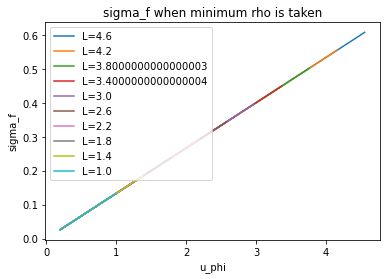

In [5]:
for i in range(L_num):
    plt.plot(u_phi_selection[:,9-i], best_sigma_f[:,9-i],label="L="+str(L_phi_selection[9-i])) 
#     plt.plot(u_phi_selection[:,9-i], argmin_eta[:,9-i])
plt.xlabel("u_phi")
plt.ylabel("sigma_f")
plt.title('sigma_f when minimum rho is taken')
plt.legend(loc='upper left')

plt.savefig("sigma_f_wrt_u_phi")

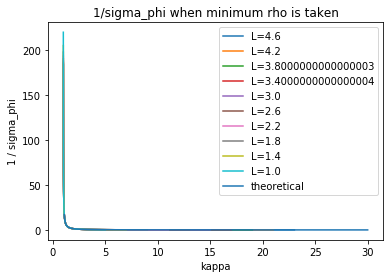

In [112]:
for i in range(10):
    plt.plot(L_phi_selection[9-i]/u_phi_selection[:,9-i], best_sigma_phi[:,9-i],label="L="+str(L_phi_selection[9-i])) 
#     plt.plot(L_phi_selection[9-i]/u_phi_selection[:,9-i], 1/best_sigma_phi[:,9-i]-(L_phi_selection[9-i]/u_phi_selection[:,9-i]),label="L="+str(L_phi_selection[9-i])) 
#     plt.plot(u_phi_selection[:,9-i], argmin_eta[:,9-i])
plt.plot(x,y,label="theoretical")

plt.xlabel("kappa")
plt.ylabel("1 / sigma_phi")
# plt.xlim(0,5)
# plt.ylim(0,20)
plt.title('1/sigma_phi when minimum rho is taken')
plt.legend(loc='upper right')

# plt.savefig("1_over_sigma_phi_wrt_kappa")

1000


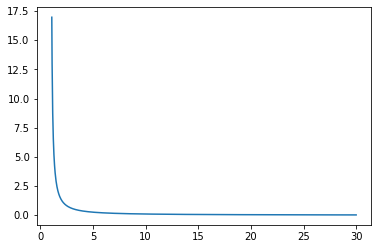

In [109]:
x = np.linspace(1.1,30,1000,endpoint=False)
print(x.shape[0])
y = np.zeros(x.shape[0])
for i in range(1000):
    y[i] = 4*u_f*L_f/(u_f+L_f)**2 * (1+x[i])/(x[i]*(x[i]-1))
# print(y)
plt.plot(x,y)
plt.show()

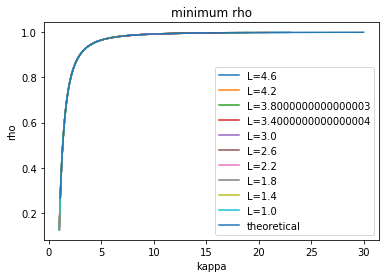

In [118]:
for i in range(L_num):
    plt.plot(L_phi_selection[9-i]/u_phi_selection[:,9-i], best_rho[:,9-i] ,label="L="+str(L_phi_selection[9-i])) 
#     plt.plot(u_phi_selection[:,9-i], argmin_eta[:,9-i])
plt.plot(x,y,label="theoretical")

plt.xlabel("kappa")
plt.ylabel("rho")
# plt.xlim(0,5)
# plt.ylim(0,50)
plt.title('minimum rho')
plt.legend(loc='lower right')
plt.savefig("sigma_phi_wrt_kappa_theory")

1000


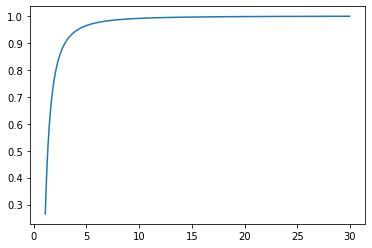

In [115]:
x = np.linspace(1.1,30,1000,endpoint=False)
print(x.shape[0])
y = np.zeros(x.shape[0])
for i in range(1000):
    y[i] = 1 - 4*u_f*L_f/(u_f+L_f)**2 /x[i]**2
# print(y)
plt.plot(x,y)
plt.show()

In [1]:
import mosek

In [2]:
mosek.setSolverParam("numThreads", 4)

AttributeError: module 'mosek' has no attribute 'setSolverParam'

In [24]:
u_f = 1
L_f = 10

u_phi = 0.5
L_phi = 1

M_f = np.zeros((4,4))
M_f[1,1]= -(u_f*L_f)/(u_f+L_f)
M_f[1,2]= 1/2
M_f[2,1]= 1/2
M_f[2,2]= -(1)/(u_f+L_f)


M_phi = np.zeros((4,4))
M_phi[1,1]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[1,0]= 1/2
M_phi[0,1]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)

# eta = 0.2

# print(M_0)
print(M_f)
print(M_phi)

sigma_f = cp.Variable()
sigma_phi = cp.Variable()
rho = cp.Variable()
eta = cp.Variable()
epsilon = cp.Variable()

M_0_part_1 = np.zeros((4,4))
M_0_part_2 = np.zeros((4,4))
M_0_part_3 = np.zeros((4,4))

M_0_part_1[0,0]= (1)/(2*u_phi)
M_0_part_1[1,1]= (-u_phi)/(2)

# M_0_part_1[1,2]= -1/2*eta
# M_0_part_1[2,1]= -1/2*eta
# M_0_part_1[2,2]= (eta*eta)/(2*u_phi)

M_0_part_2[0,0] = -1/(2*u_phi)

M_0_part_3[1,1] = L_f/2


Compliment_part_1 = np.zeros((4,4))
Compliment_part_2 = np.zeros((4,4))

Compliment_part_1[1,3] = -np.sqrt(u_phi/2)
Compliment_part_1[3,1] = -np.sqrt(u_phi/2)
Compliment_part_1[3,3] = 1

Compliment_part_2[2,3] = 1/np.sqrt(u_phi*2)
Compliment_part_2[3,2] = 1/np.sqrt(u_phi*2)

constraints = [sigma_f >= 0]
constraints += [sigma_phi >= 0]
constraints += [(-M_0_part_1 - rho*M_0_part_2 - epsilon*M_0_part_3 - sigma_f*M_f - sigma_phi*M_phi + Compliment_part_1 + eta*Compliment_part_2) >> 0]
constraints += [rho >= 1]
constraints += [eta >= 0]
constraints += [rho <= 1]
constraints += [epsilon >= 0]


prob=cp.Problem(cp.Maximize(epsilon), constraints)
# prob=cp.Problem(cp.Maximize(rho), constraints)
prob.solve()


print("The optimal value is", prob.value)
print("A solution is")
print(sigma_f.value, sigma_phi.value, eta.value, epsilon.value)

print(prob.value == 0)

[[ 0.          0.          0.          0.        ]
 [ 0.         -0.90909091  0.5         0.        ]
 [ 0.          0.5        -0.09090909  0.        ]
 [ 0.          0.          0.          0.        ]]
[[-0.66666667  0.5         0.          0.        ]
 [ 0.5        -0.33333333  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
The optimal value is 0.01652892988102105
A solution is
0.09090914907355978 7.937930782740572e-07 0.09090914801425788 0.01652892988102105
False
